### Questions 11-13
Consider a sequence where an element $X_t$ is defined as
$$
X_t = \left\{\begin{array}{cc} a & \text{if } t = 0 \\ b & \text{if }t = 1 \\ f\left(X_{t-1}, X_{t-2}\right)  & \text{ if } t \geq 2 \end{array}  \right.
$$
where $a$ and $b$ are non-negative real numbers and $t$ is a non-negative integer. $f(.)$ is some generic function of $X_{t-1}$ and $X_{t-2}$. 

#### Question 11
 We will write a function to calculate $X_t$. Define a function called `calc_X_t`. It should take the following inputs:
- an integer `t`
- a function of two variables `f`
- two more parameters `a` and `b`

These parameters will correspond in the obvious way to the mathematical objects above.   Given those inputs, your function `calc_X_t` should ***return***  $X_t$ -- the $t$-th element of the sequence we just described.

**Hint:** Your function will likely contain if-else statements and a loop. Remember to call your function within `calc_X_t`.

In [1]:
# your code here. 
# Note that this solution does NOT require recursion... the recursive method will be MUCH slower!
def calc_X_t(t, f, a, b):
    if t == 0:
        return a
    if t == 1:
        return b
    xt = b
    xtm1 = a
    for i in range(t-1):
        nv = f(xt, xtm1)
        xtm1 = xt
        xt = nv
    return xt

After defining your function, **run** the cell below.

In [2]:
# !!!! Do no edit this code !!!!
def weird_function(x,y):
    return 20 * (((x + y) ** (1/2)) + ((x + y) ** (1/3)))
test = calc_X_t(50, weird_function, 55, 43)
print(test)
# !!!! Do no edit this code !!!!

1290.337693706048


#### Question 12
The Fibonacci Sequence is a specific case of this sequence which we will denote by $X^f_t$:

$$
X^f_t = \left\{\begin{array}{cc} 0 & \text{if } t = 0 \\ 1 & \text{if }t = 1 \\ X_{t-1}+ X_{t-2} & \text{ if } t \geq 2 \end{array}  \right.
$$

Do **all** of these in the following order. Make sure you define variables as specified.
 1. Think about what `a`, `b`, and `f` need to be in order to go from the general sequence to the Fibonacci sequence. **Define those objects**. 
 2. Use `calc_X_t` and the objects you just defined to calculate $X^f_t$ for $t=0$, $t=1$, $t=10$, and $t=20$. **Save those values** as `Xf_0`, `Xf_1`, `Xf_10`, and `Xf_20` respectively.
 3. **Use** `print` on all of four of these values, so they are displayed in the output.

**Hint:** One raised to any power is equal to one. Also, this is a good time to check that your code works by hand with small t > 2. 

In [3]:
# your code here
a = 0
b = 1
def f(x,y):
    return x+y
ts = [0, 1, 10, 20]

#2 create variables
Xts = [calc_X_t(t, f, 0, 1) for t in ts]
Xf_0 = Xts[0]
Xf_1 = Xts[1]
Xf_10 = Xts[2]
Xf_20 = Xts[3]

# 3 print the variables
print(Xf_0)
print(Xf_1)
print(Xf_10)
print(Xf_20)

0
1
55
6765


Now consider purchasing an asset on January 1st, 2023. One asset you can purchase, the twenty-four-month Fibo-Bond, pays out $X_t^f$ dollars **at the beginning of every month for twenty-four-months** where $t$ is the number of months since it was purchased. For example, it pays out:

$X_0^f$ dollars on January 1st, 2023 

$X_1^f$ dollar on February 1st, 2023

.

.

.

$X_{22}^f$ dollars on November 1st, 2024

$X_{23}^f$ dollars on December 1st, 2024
 
**Set** `r = .1` to be your discount *rate*. Using the **Present Discounted Value** framework, **calculate** how much the twenty-four-month fibo bond is worth and **assign** this value to a variable called `fibo_pdv`. **Print** `fibo_pdv`. 

**Hint:** List Comprehensions and/or loops will work here. 

In [4]:
# your code here
ts = range(0, 24)
r = .1
# Get relevant lists
payments = [calc_X_t(t, f, a, b) for t in ts]
discount_factors = [(1/(1+r)) ** t for t in ts] 
discounted_payments = [pay * df for pay, df in zip(payments, discount_factors)]

# Assign sum to variable
fibo_pdv = sum(discounted_payments)
print(fibo_pdv)

9994.81243884696


#### Question 13
In the previous question, we looked at the value of a two-year fibo bond. Now, we will repeat that exercise for bonds of many different durations. First, **generate a list of 48 elements** called `fibo_bond_vals` where the i-th index of the list is equal to the value of the i-month fibo bond. After you have defined `fibo_bond_vals`, **use** `print` to display its 24th element. 

Afterwards, **plot** a line plot with the duration of the bond on the x-axis and the value of the bond (on January 1st, 2022) on the y-axis. Make sure your plot has a title and reasonable x and y axis labels.

**Hint:** Nested list comprehensions can be useful here. Tab completion may also help in case you forget some functions. 

In [5]:
# your code here
highest_duration  = 30 # Change to 30 to see
ranges = [range(0,t) for t in range(1,highest_duration+1)]
fibo_bond_vals =  [sum([pay * df for pay, df in zip([calc_X_t(t, f, a, b) for t in ts], [(1/(1+r)) ** t for t in ts] )]) for ts in ranges]
print(fibo_bond_vals[23])

9994.81243884696


In [6]:
import matplotlib.pyplot as plt

[0.0, 0.9090909090909091, 1.7355371900826446, 3.2381667918858, 5.287207157981012, 8.391813773276787, 12.907605213707006, 19.57866075070619, 29.37531573511059, 43.79463475977507, 64.99951567839932, 96.19347273224324, 142.0763104825346, 209.5681109611829, 308.84399383457503, 454.87314394976477, 669.6731009746414, 985.6310372081573, 1450.3861503335656, 2134.0130599794047, 3139.5872035627362, 4618.7264329738955, 6794.451470937207, 9994.81243884696, 14702.351366668481, 21626.858629902716, 31812.393272364847, 46794.70349545789, 68832.78274162688, 101249.47480268385]


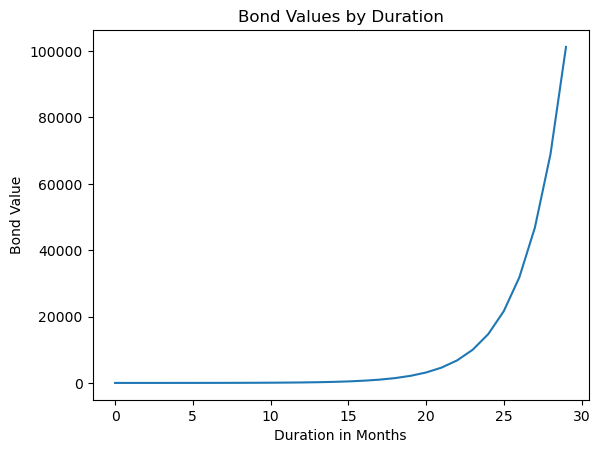

In [7]:
plt.plot(range(0,highest_duration), fibo_bond_vals)
plt.title("Bond Values by Duration")
plt.xlabel("Duration in Months")
plt.ylabel("Bond Value")
print(fibo_bond_vals)